In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [58]:
# Reading the csv file.

df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [59]:
# Getting column and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [60]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


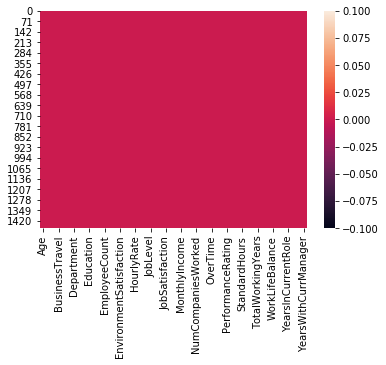

In [61]:
sns.heatmap(df.isnull())

There are no null values in the data set.

In [62]:
# Encoding values as part of transformation.

from sklearn.preprocessing import LabelEncoder 
df_new=df.apply(LabelEncoder().fit_transform)

In [63]:
# Changing the data types from object type to integer types for better analysis.

df_new[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']] = df_new[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']].apply(pd.to_numeric) 
df_new.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [64]:
#  Checking skewed data.
df_new.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [65]:
# Normalizing the skewed data for PerformanceRating,YearsSinceLastPromotion     

from scipy.stats import boxcox
from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform

#df_new['Attrition']=boxcox(df_new['Attrition'],0.5)
              
#df_new['Attrition']=boxcox1p(df_new['Attrition'],0.5)    
df_new['JobLevel']=boxcox1p(df_new['JobLevel'],0.5)   
df_new['PerformanceRating']=boxcox1p(df_new['PerformanceRating'],0.5)   
df_new['YearsSinceLastPromotion']=boxcox1p(df_new['YearsSinceLastPromotion'],0.5)  


In [66]:
df_new.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.593923
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [67]:
# Checking the zscore in order to normalize the data.

from scipy.stats import zscore
z= np.abs(zscore(df_new))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.82919715,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.27597926,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.82919715,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.82919715,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.82919715,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.27597926,
        0.59522723]])

In [68]:
# Removing the outliers having zscore value of more than 3.

df_new[(z<3).all(axis=1)]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


There are no rows with zscore < 3.

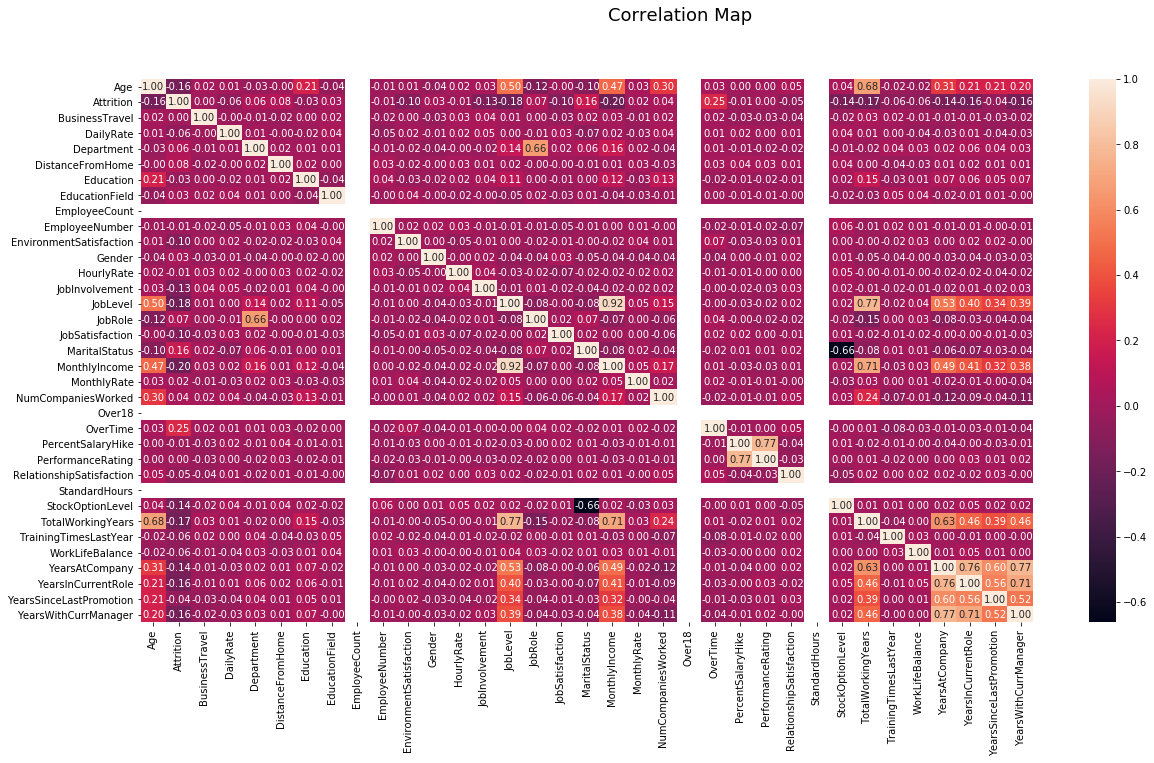

In [69]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_new.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

From the above graph we can see that Attrition rate is caused by factors like YearsAtCompany,OverTime,MaritalStatus.

Also we can drop the columns EmployeeCount, Over18,StandardHours as they do not contribute in prediction.

In [70]:
df_new.drop(columns=['EmployeeCount','Over18','StandardHours'])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,...,0.000000,0,0,8,0,0,6,4,0.000000,5
1,31,0,1,113,1,7,0,1,1,2,...,0.828427,3,1,10,3,2,10,7,0.828427,7
2,19,1,2,805,1,1,1,4,2,3,...,0.000000,1,0,7,3,2,0,0,0.000000,0
3,15,0,1,820,1,2,3,1,3,3,...,0.000000,2,0,8,3,2,8,7,2.000000,0
4,9,0,2,312,1,1,0,3,4,0,...,0.000000,3,1,6,3,2,2,2,1.464102,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,1465,2,...,0.000000,2,1,17,3,2,5,2,0.000000,3
1466,21,0,2,327,1,5,0,3,1466,3,...,0.000000,0,1,9,5,2,7,7,0.828427,7
1467,9,0,2,39,1,3,2,1,1467,1,...,0.828427,1,1,6,0,2,6,2,0.000000,3
1468,31,0,1,579,2,1,2,3,1468,3,...,0.000000,3,0,17,3,1,9,6,0.000000,8


Text(0, 0.5, 'EmployeeNumber')

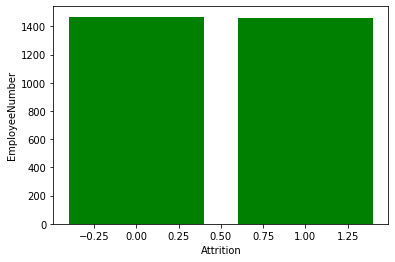

In [71]:
#plt.hist(df['Attrition'], bins=10)
plt.bar

plt.bar(df_new['Attrition'], df_new['EmployeeNumber'], color='g')
plt.xlabel('Attrition')
plt.ylabel('EmployeeNumber')

In [72]:
#sns.catplot()

In [73]:
# Setting x
x=df_new.drop(['Attrition'],axis=1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,0,0,1,...,0,0,0,8,0,0,6,4,0.000000,5
1,31,1,113,1,7,0,1,0,1,2,...,3,0,1,10,3,2,10,7,0.828427,7
2,19,2,805,1,1,1,4,0,2,3,...,1,0,0,7,3,2,0,0,0.000000,0
3,15,1,820,1,2,3,1,0,3,3,...,2,0,0,8,3,2,8,7,2.000000,0
4,9,2,312,1,1,0,3,0,4,0,...,3,0,1,6,3,2,2,2,1.464102,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,0,1465,2,...,2,0,1,17,3,2,5,2,0.000000,3
1466,21,2,327,1,5,0,3,0,1466,3,...,0,0,1,9,5,2,7,7,0.828427,7
1467,9,2,39,1,3,2,1,0,1467,1,...,1,0,1,6,0,2,6,2,0.000000,3
1468,31,1,579,2,1,2,3,0,1468,3,...,3,0,0,17,3,1,9,6,0.000000,8


In [74]:
# Settting y axis as Attrition column for prediction.
y=df_new['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [75]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
#scale = MinMaxScaler()
x=scale.fit_transform(x)

In [76]:

max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    #print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)




Max_accuracy_Score corresponding to final_r_state:  93  is  0.8967391304347826


In [77]:
# Setting the test x & y values
# Setting the train x & y values
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=83)

In [78]:
train_x.shape

(1102, 34)

In [79]:
train_y.shape

(1102,)

In [80]:
test_x.shape

(368, 34)

In [81]:
test_y.shape

(368,)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [83]:
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=10)
GNB=GaussianNB()

In [84]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [85]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,threshold=roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score= ",roc_auc)
    rocscore.append(roc_auc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n\n")

-------------- KNeighborsClassifier --------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
Accuracy Score:  0.8614130434782609
Cross_Val_Score:  0.8421768707482993
roc_auc_score=  0.5446428571428571
[[312   0]
 [ 51   5]]



-------------- SVC --------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score:  0.8804347826086957
Cross_Val_Score:  0.8578231292517007
roc_auc_score=  0.6144688644688645
[[311   1]
 [ 43  13]]



-------------- LogisticRegression --------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
              

In [86]:
result=pd.DataFrame({"Model": Model, "Accuracy_Score": score,"Cross_Val_Score":cvs,"ROC_Auc_Curve":rocscore})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,86.141304,84.217687,54.464286
1,SVC,88.043478,85.782313,61.446886
2,LogisticRegression,89.130435,86.598639,70.879121
3,DecisionTreeClassifier,79.347826,75.578231,62.912088
4,GaussianNB,80.706522,80.476190,72.504579


# I choose LogisticRegression here as it has better accurancy of 89%.

In [87]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
df.to_csv('HRAttrition_Predict.csv')
predictData

,0
0,0
1,1
2,0
3,1
4,0
...,...
363,0
364,0
365,1
366,0


In [88]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(LR,"LR_HRAttrition.pkl")

['LR_HRAttrition.pkl']